In [1]:
!python --version


Python 3.11.4


In [2]:
!which python


/c/Users/avira/.conda/envs/fresh11/python


In [3]:
# 1. Install Dependencies and Setup

!pip install tensorflow opencv-python matplotlib



  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.30.0 requires typing_extensions>=4.6; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.


In [4]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.7.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
blinker                      1.9.0
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        8.1.7
cloud-tpu-client             0.10
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.10
decorator                    5.1.1
defusedxml                   0.7.

In [5]:
!pip install cloud-tpu-client


In [6]:
pip list | grep tensorflow

tensorflow                   2.13.0
tensorflow-estimator         2.13.0
tensorflow-intel             2.13.0
tensorflow-io-gcs-filesystem 0.31.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install tensorflow==2.13.0
!pip install tensorflow-intel==2.13.0


In [8]:
pip list | grep tensorflow

tensorflow                   2.13.0
tensorflow-estimator         2.13.0
tensorflow-intel             2.13.0
tensorflow-io-gcs-filesystem 0.31.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
import os

In [10]:

print(tf.__version__)


2.13.0


In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [13]:
import cv2
import imghdr

C:\Users\avira\AppData\Local\Temp\ipykernel_11136\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [14]:
data_dir = 'data' 

In [15]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [16]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

FreshApple (100).jpg
FreshApple (101).jpg
FreshApple (102).jpg
FreshApple (103).jpg
FreshApple (104).jpg
FreshApple (105).jpg
FreshApple (106).jpg
FreshApple (107).jpg
FreshApple (108).jpg
FreshApple (109).jpg
FreshApple (110).jpg
FreshApple (111).jpg
FreshApple (112).jpg
FreshApple (113).jpg
FreshApple (114).jpg
FreshApple (115).jpg
FreshApple (116).jpg
FreshApple (117).jpg
FreshApple (118).jpg
FreshApple (119).jpg
FreshApple (12).jpg
FreshApple (120).jpg
FreshApple (121).jpg
FreshApple (122).jpg
FreshApple (123).jpg
FreshApple (124).jpg
FreshApple (125).jpg
FreshApple (126).jpg
FreshApple (127).jpg
FreshApple (128).jpg
FreshApple (129).jpg
FreshApple (13).jpg
FreshApple (130).jpg
FreshApple (131).jpg
FreshApple (132).jpg
FreshApple (133).jpg
FreshApple (134).jpg
FreshApple (135).jpg
FreshApple (136).jpg
FreshApple (137).jpg
FreshApple (138).jpg
FreshApple (139).jpg
FreshApple (14).jpg
FreshApple (140).jpg
FreshApple (141).jpg
FreshApple (142).jpg
FreshApple (143).jpg
FreshApple (144)

In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [18]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [19]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 15482 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
print(f"Dataset size: {len(data)}")

Dataset size: 484


In [22]:
#Class 1 = Rotten
#Class 0 = Fresh
batch = data_iterator.next()

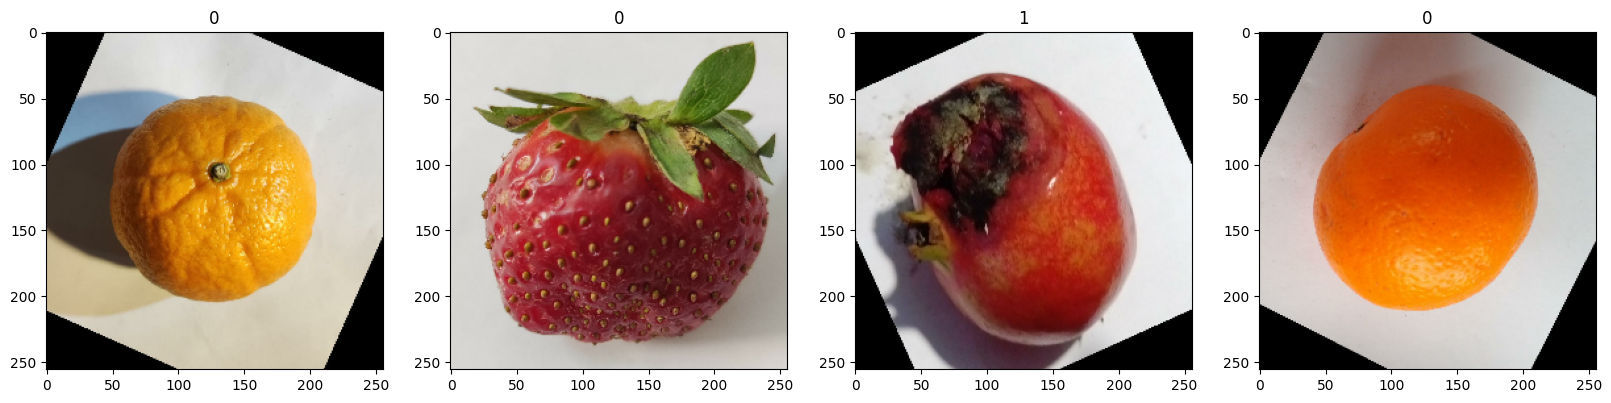

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [26]:
# 5. Split Data

In [27]:
len(data)

484

In [28]:
27 * .7

18.9

In [29]:
27 * .2

5.4

In [30]:
27 * .1

2.7

In [31]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [32]:
train_size

339

In [33]:
val_size

96

In [34]:
test_size

49

In [35]:
train_size + val_size + test_size

484

In [36]:
train = data.take(train_size) 
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [37]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.regularizers import l2

In [39]:
model = Sequential()

In [40]:
# Specify batch size and input shape using batch_shape
model.add(Input(shape=(256, 256, 3)))  # Batch size of 32, image size 256x256, RGB channels

# First convolutional layer with regularization
model.add(Conv2D(16, (3, 3), 1, activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())

# Second convolutional layer with regularization
model.add(Conv2D(32, (3, 3), 1, activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())

# Third convolutional layer with regularization
model.add(Conv2D(16, (3, 3), 1, activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())

# Flatten the output to feed it into the fully connected layers
model.add(Flatten())

# Dense layer with regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

In [41]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
339/339 [==============================] - 492s 1s/step - loss: 0.5653 - accuracy: 0.7599 - val_loss: 0.3809 - val_accuracy: 0.8577
Epoch 2/10
339/339 [==============================] - 560s 2s/step - loss: 0.3392 - accuracy: 0.8784 - val_loss: 0.3094 - val_accuracy: 0.8971
Epoch 3/10
339/339 [==============================] - 555s 2s/step - loss: 0.2986 - accuracy: 0.8978 - val_loss: 0.2721 - val_accuracy: 0.9059
Epoch 4/10
339/339 [==============================] - 562s 2s/step - loss: 0.2865 - accuracy: 0.9044 - val_loss: 0.2644 - val_accuracy: 0.9170
Epoch 5/10
339/339 [==============================] - 622s 2s/step - loss: 0.2504 - accuracy: 0.9223 - val_loss: 0.2271 - val_accuracy: 0.9342
Epoch 6/10
339/339 [==============================] - 546s 2s/step - loss: 0.2393 - accuracy: 0.9264 - val_loss: 0.2734 - val_accuracy: 0.9167
Epoch 7/10
339/339 [==============================] - 564s 2s/step - loss: 0.2227 - accuracy: 0.9369 - val_loss: 0.2645 - val_accuracy: 0.9193

# 8. Plot Performance

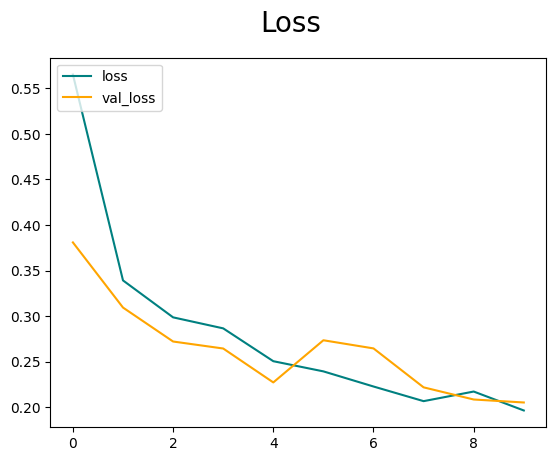

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

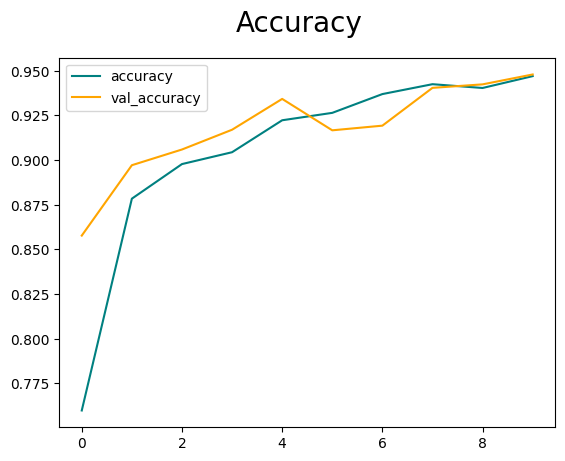

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 416ms/step


In [51]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9709141254425049, Recall:0.8929936289787292, Accuracy:0.9327784776687622


# 10. Test

In [52]:
import cv2

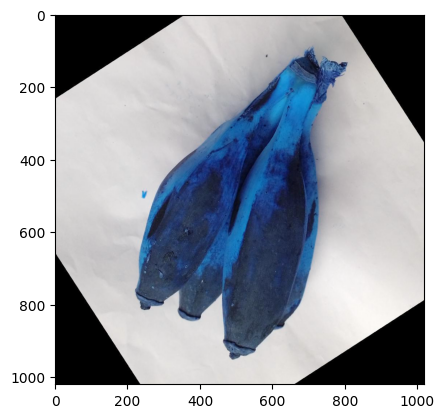

In [53]:
img = cv2.imread('RottenBanana (557).jpg')
plt.imshow(img)
plt.show()

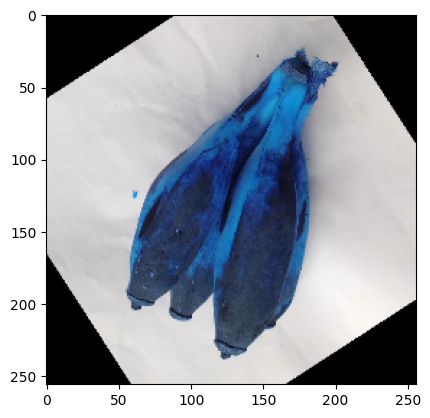

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [56]:
yhat

array([[0.9698426]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Rotten')
else:
    print(f'Predicted class is Fresh')

Predicted class is Rotten


# 11. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','GridStack6.keras'))

In [65]:
new_model = load_model('models/GridStack6.keras')

In [66]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 234ms/step


array([[0.9698426]], dtype=float32)

In [67]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0